# Определение перспективного тарифа для телеком компании

## Содержание: <a name="content"></a>
- [Импорт библиотек, загрузка и просмотр данных](#loading)
- [Предодработка данных](#preprocessing)
- [Исследовательский анализ](#eda)
- [Проверка гипотез](#hypothesis_testing)
- [Выводы](#results)

### Импорт библиотек, загрузка и просмотр данных  <a name="loading"></a>

[к содержанию](#content)

In [1]:
# Импортируем нужные библиотеки и открываем файлы
import pandas as pd
import numpy as np
from scipy import stats as st
import math
#функция, которая позволит масштабировать графики и видеть координаты xy при наведении курсором на значение
%matplotlib notebook 
import matplotlib.pyplot as plt
#дополнительные средства визуализации
import seaborn as sns 

#from scipy.spatial import ConvexHull
#import warnings; warnings.simplefilter('ignore')
#sns.set_style("white")

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
# Посмотрим каждый файл в отдельности:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [6]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
# Переименуем столбец 'tariff' в 'tariff_name', чтобы можно было объединять данные по этому столбцу с предыдущей таблицей
users.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date','tariff_name']
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null object
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null object
tariff_name    500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Получены данные 500 пользователей, данные представлены в пяти отдельных таблицах:
 - `calls` - дана информация о звонках (id звонка, дата, длительность и id пользователя)
 - `internet` - дана информация об интернет-сессиях (id сессии, дата, объем трафика и id пользователя)
 - `messages` - дана информация о сообщениях (id сообщения, дата и id пользователя)
 - `tariffs` - дана информация о тарифах оператора (название тарифа, абоненская плата, количество минут, сообщений и трафика входящих в нее и стоимость дополнительных минут, сообщений и трафика)
 - `users` - дана информация о пользователях (id пользователя, имя, фамилия, возраст, дата подключения и прекращения пользования, город и название тарифа).

Во всех таблицах неправильный формат для дат (object). В таблице `calls` 39 613 звонков с длительностью 0.0 минут - это почти 20% от общего количества - нужна предобработка. В таблице `internet` 19598 сессии с нулевым трафиком (более 13% от общего количества) - их также нужно обработать. Необходимо округлить количество минут и мегабайтов вверх до целого. В таблицах нет пропущеных данных, кроме пропусков в таблице `users` в `churn_date` - эти пропуски объяснены в описании задачи и означаю, что договор с клиентом не прекратил действие. Эти пропуски остаются как есть.

### Предодработка данных  <a name="preprocessing"></a>

[к содержанию](#content)

Нам необходимо:
1. Привести данные в столбцах с датами к типу datetime;
2. Округлить количество минут и мегабайтов вверх до целого;
3. Разобраться со звонками и сессиями с нулевой длительностью/объемом трафика;
4. Посчитать для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя.

In [15]:
# Меняем тип данных из столбцов с датами с object на datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [16]:
# Далее необходимо будет вычислить ежемесячную выручку, для этого укажем в отдельном столбце месяц 
calls['call_date_month'] = calls['call_date'].dt.month
internet['session_date_month'] = internet['session_date'].dt.month
messages['message_date_month'] = messages['message_date'].dt.month

In [17]:
# Округляем количество минут и мегабайтов вверх до целого
calls['duration'] = calls['duration'].apply(math.ceil)
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

Почти 20% звонков имеют длительность 0.00 минут и 13% сессий имеют нулевой объем трафика. Причина этого ножет быть в том, что при осуществлении звонка и подключению к интернету фактически не было установлено соединение (проблемы со связью/доступом к интернету, вызываемый абонент был недоступен или занят).
Такие звонки и сессии не стоит учитывать в нашем исследовании, так как они не оплачивались абонентами - удалим их из таблиц.

In [18]:
utilized_internet = internet.query('mb_used != 0')
utilized_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0            129798 non-null int64
id                    129798 non-null object
mb_used               129798 non-null int64
session_date          129798 non-null datetime64[ns]
user_id               129798 non-null int64
session_date_month    129798 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.9+ MB


In [19]:
real_calls = calls.query('duration != 0')
real_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
id                 162994 non-null object
call_date          162994 non-null datetime64[ns]
duration           162994 non-null int64
user_id            162994 non-null int64
call_date_month    162994 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.5+ MB


In [20]:
# Сгруппируем данные по id пользователя и месяцу и посчитаем количество звонков и минут
# добавим информа
real_calls_user_id = real_calls.groupby(['user_id', 'call_date_month'])['duration'].agg(['count', 'sum'])

In [21]:
real_calls_user_id.head()

count  sum
user_id call_date_month            
1000    5                   17  159
        6                   28  172
        7                   41  340
        8                   42  408
        9                   46  466

In [22]:
# Аналогично посчитаем количество собщений и объем трафика на каждого пользователя
messages_user_id = messages.groupby(['user_id', 'message_date_month'])['id'].count()
internet_user_id = utilized_internet.groupby(['user_id', 'session_date_month'])['mb_used'].sum()

In [23]:
messages_user_id.head()

user_id  message_date_month
1000     5                     22
         6                     60
         7                     75
         8                     81
         9                     57
Name: id, dtype: int64

In [24]:
internet_user_id.head()

user_id  session_date_month
1000     5                      2256
         6                     23257
         7                     14016
         8                     14070
         9                     14581
Name: mb_used, dtype: int64

In [25]:
# Сведем данные трех таблиц вместе
call_messages_internet = pd.concat([real_calls_user_id, messages_user_id, internet_user_id], axis=1)
call_messages_internet=call_messages_internet.reset_index()
call_messages_internet.columns = ['user_id', 'date_month', 'number_calls', 'number_minutes', 'number_messages', 'traffic_volume']
call_messages_internet.head()

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


In [26]:
# Добавить данные из таблицы по пользователям
df_total = pd.merge(call_messages_internet, users.loc[:, ['tariff_name', 'city', 'user_id']], on='user_id')
#call_messages_internet.columns = ['user_id', 'date_month', 'number_calls', 'number_minutes', 'number_messages', 'traffic_volume', 'tariff_name', 'city']
df_total.head()

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume,tariff_name,city
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар


In [27]:
# Посчитаем ежемесячную выручку по каждому пользователю
# Для этого сначала добавим стоимость абоненской платы
df_total = pd.merge(df_total, tariffs.loc[:, ['rub_monthly_fee', 'tariff_name']], on='tariff_name')
df_total.head()

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume,tariff_name,city,rub_monthly_fee
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950


In [28]:
# Заполним данные о стоимости перерасходованных минут, sms и Гб
def cost_of_additional_minutes(raw):
    if raw['tariff_name'] == 'smart':
        if raw['number_minutes'] - tariffs['minutes_included'][0] > 0:
            return (raw['number_minutes'] - tariffs['minutes_included'][0])*tariffs['rub_per_minute'][0]
        return 0
    else:
        if raw['number_minutes'] - tariffs['minutes_included'][1] > 0:
            return (raw['number_minutes'] - tariffs['minutes_included'][1])*tariffs['rub_per_minute'][1]
        return 0
    

    
    
def cost_of_additional_messages(raw):
    if raw['tariff_name'] == 'smart':
        if raw['number_messages'] - tariffs['messages_included'][0] > 0:
            return (raw['number_messages'] - tariffs['messages_included'][0])*tariffs['rub_per_message'][0]
        return 0
    else:
        if raw['number_messages'] - tariffs['messages_included'][1] > 0:
            return (raw['number_messages'] - tariffs['messages_included'][1])*tariffs['rub_per_message'][1]
        return 0
    
    
    
    
def cost_of_additional_gb(raw):
    if raw['tariff_name'] == 'smart':
        if raw['traffic_volume'] - tariffs['mb_per_month_included'][0] > 0:
            return (raw['traffic_volume'] - tariffs['mb_per_month_included'][0])/1024*tariffs['rub_per_minute'][0]
        return 0
    else:
        if raw['traffic_volume'] - tariffs['mb_per_month_included'][1] > 0:
            return (raw['traffic_volume'] - tariffs['mb_per_month_included'][1])/1024*tariffs['rub_per_minute'][1]
        return 0

In [29]:
df_total['cost_add_minutes'] = df_total.apply(cost_of_additional_minutes, axis=1)
df_total['cost_add_messages'] = df_total.apply(cost_of_additional_messages, axis=1)
df_total['cost_add_gb'] = df_total.apply(cost_of_additional_gb, axis=1)
df_total['total_cost_month'] = (df_total['rub_monthly_fee'] +
                                df_total['cost_add_minutes'] +
                                df_total['cost_add_messages'] +
                                df_total['cost_add_gb']
                               )
df_total.head()

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume,tariff_name,city,rub_monthly_fee,cost_add_minutes,cost_add_messages,cost_add_gb,total_cost_month
0,1000,5,17.0,159.0,22.0,2256.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
1,1000,6,28.0,172.0,60.0,23257.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
2,1000,7,41.0,340.0,75.0,14016.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
3,1000,8,42.0,408.0,81.0,14070.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0
4,1000,9,46.0,466.0,57.0,14581.0,ultra,Краснодар,1950,0.0,0.0,0.0,1950.0


In [30]:
# Посмотрим часто ли пользователи выходят за рамки аббонентской платы
df_total.query('tariff_name == "ultra" and total_cost_month > 1950')

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume,tariff_name,city,rub_monthly_fee,cost_add_minutes,cost_add_messages,cost_add_gb,total_cost_month
50,1024,11,127.0,1146.0,NaN,43146.0,ultra,Санкт-Петербург,1950,0.0,0.0,12.134766,1962.134766
51,1024,12,108.0,949.0,NaN,35985.0,ultra,Санкт-Петербург,1950,0.0,0.0,5.141602,1955.141602
78,1050,7,26.0,209.0,52.0,35205.0,ultra,Тюмень,1950,0.0,0.0,4.379883,1954.379883
97,1060,12,144.0,1233.0,52.0,43973.0,ultra,Калуга,1950,0.0,0.0,12.942383,1962.942383
228,1124,10,130.0,1225.0,121.0,49789.0,ultra,Махачкала,1950,0.0,0.0,18.622070,1968.622070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1469,11,88.0,795.0,NaN,35533.0,ultra,Сочи,1950,0.0,0.0,4.700195,1954.700195
958,1474,12,132.0,1345.0,105.0,42356.0,ultra,Набережные Челны,1950,0.0,0.0,11.363281,1961.363281
979,1493,12,69.0,571.0,78.0,42776.0,ultra,Красноярск,1950,0.0,0.0,11.773438,1961.773438
981,1495,9,95.0,813.0,82.0,33105.0,ultra,Иркутск,1950,0.0,0.0,2.329102,1952.329102


В представленной таблице пользователи тарифа "Ультра" редко платят больше аббонентской платы и дополнительно оплачивают только интернет.

In [31]:
df_total.query('tariff_name == "smart" and total_cost_month > 550')

,user_id,date_month,number_calls,number_minutes,number_messages,traffic_volume,tariff_name,city,rub_monthly_fee,cost_add_minutes,cost_add_messages,cost_add_gb,total_cost_month
985,1001,11,45.0,430.0,NaN,18452.0,smart,Москва,550,0.0,0.0,9.058594,559.058594
988,1002,7,21.0,214.0,11.0,17601.0,smart,Стерлитамак,550,0.0,0.0,6.565430,556.565430
989,1002,8,37.0,289.0,13.0,20347.0,smart,Стерлитамак,550,0.0,0.0,14.610352,564.610352
990,1002,9,25.0,206.0,4.0,16712.0,smart,Стерлитамак,550,0.0,0.0,3.960938,553.960938
992,1002,11,25.0,243.0,16.0,18610.0,smart,Стерлитамак,550,0.0,0.0,9.521484,559.521484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1498,9,53.0,471.0,44.0,22166.0,smart,Владикавказ,550,0.0,0.0,19.939453,569.939453
3209,1498,10,30.0,247.0,42.0,20604.0,smart,Владикавказ,550,0.0,0.0,15.363281,565.363281
3211,1499,10,44.0,449.0,48.0,17809.0,smart,Пермь,550,0.0,0.0,7.174805,557.174805
3212,1499,11,62.0,612.0,59.0,17984.0,smart,Пермь,550,336.0,27.0,7.687500,920.687500


Пользователи тарифа "Смарт" напротив чаще всего платят сверх абонненской платы (в 1665 наблюдениях из 2229, то есть почти в 75% случаев)

In [32]:
# Есть наблюдения, в которых пользователи не пользуются некоторыми услугами
df_total.isnull().sum()

user_id                0
date_month             0
number_calls          46
number_minutes        46
number_messages      497
traffic_volume        13
tariff_name            0
city                   0
rub_monthly_fee        0
cost_add_minutes       0
cost_add_messages      0
cost_add_gb            0
total_cost_month       0
dtype: int64

In [33]:
# Заменим пропуски на нули, так как эти пользователи за данный период использовали 0 минут/сообщений/мегабайтов
df_total['number_calls'] = df_total['number_calls'].fillna(0)
df_total['number_minutes'] = df_total['number_minutes'].fillna(0)
df_total['number_messages'] = df_total['number_messages'].fillna(0)
df_total['traffic_volume'] = df_total['traffic_volume'].fillna(0)

### Вывод

Были изменены типы данных для столбцов с датами во всех таблицах. 
Количество использованных минут и мегабайтов были округлены вверх до целого.
"Нулевые" звонки и сессии были исключены из выборки, так как они не оплачивались пользователями и ничего не принесли компании.
Данные были объеденены в общую таблицу, после чего появившиеся пропуски заменили на нули для дальнейшего анализа.
Была посчитана ежемесячная выручка с каждого пользователя.

### Исследовательский анализ  <a name="eda"></a>

[к содержанию](#content)

Опишим поведение клиентов: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 
Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишим распределения.

In [34]:
# Разобьем общую таблицу на 2 исходя из тарифов пользователей и посмотрим на распределение данных
smart_users = df_total.query('tariff_name == "smart"')
ultra_users = df_total.query('tariff_name == "ultra"')
# Добавим столбец с объемом трафика в Гб
smart_users['traffic_volume_gb'] = smart_users['traffic_volume']/1024
ultra_users['traffic_volume_gb'] = ultra_users['traffic_volume']/1024

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
def hist_boxplot(column):
    fig = plt.figure(figsize=(10,10))

    area = fig.add_subplot(2, 2, 1)
    ax = smart_users.boxplot(column)
    ax.set_title("Тариф Смарт")

    area = fig.add_subplot(2, 2, 2)
    ax = ultra_users.boxplot(column)
    ax.set_title("Тариф Ультра")

    area = fig.add_subplot(2, 2, 3)
    ax = sns.distplot(smart_users[column])
    ax.set_title("Тариф Смарт")

    area = fig.add_subplot(2, 2, 4)
    ax = sns.distplot(ultra_users[column])
    ax.set_title("Тариф Ультра")

#### Посмотрим распределение длительности звонков

<IPython.core.display.Javascript object>


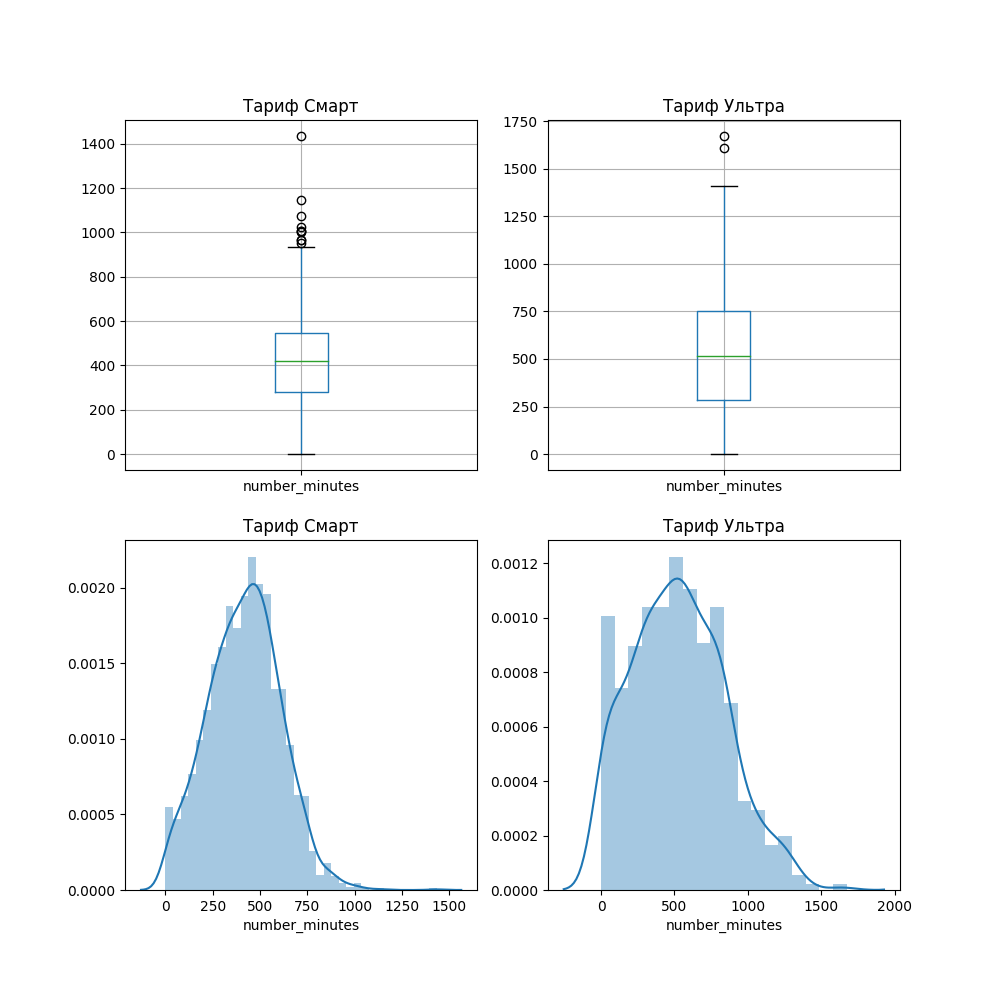

In [36]:
hist_boxplot('number_minutes')

<IPython.core.display.Javascript object>


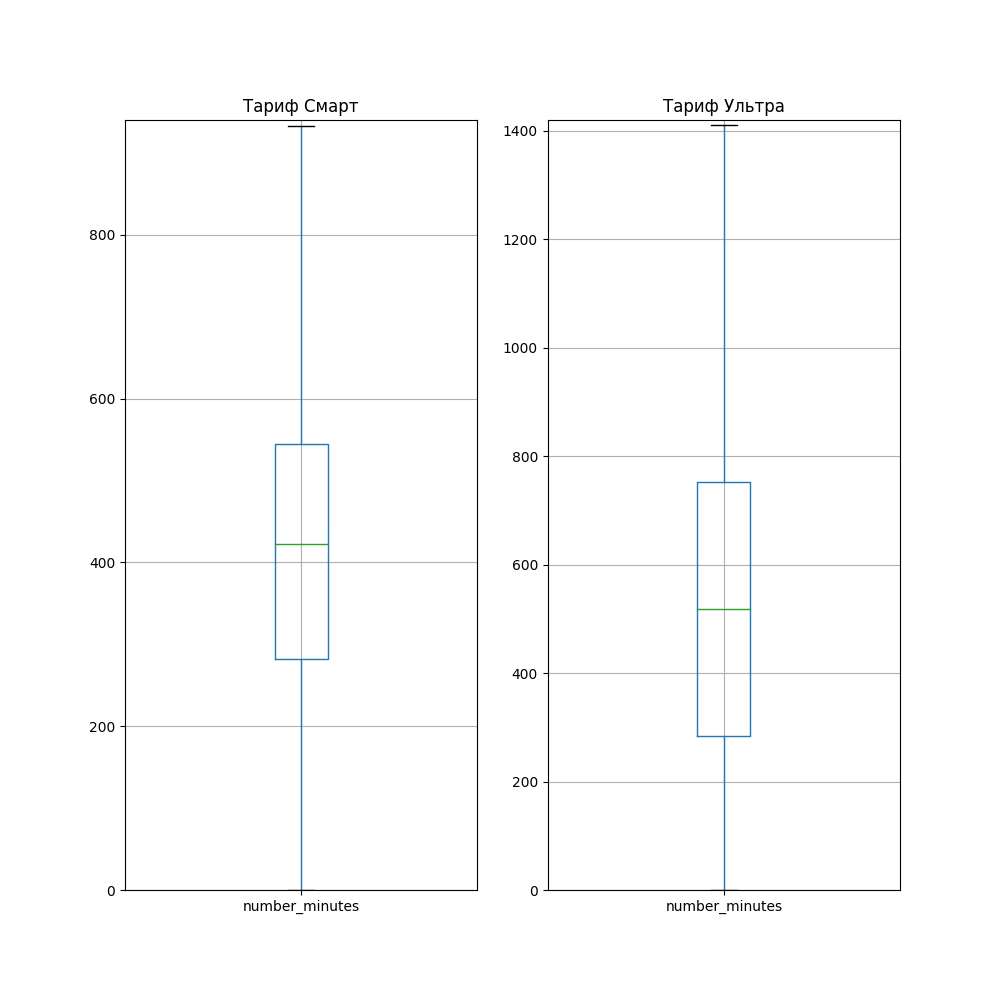

(0, 1420)

In [37]:
#Посмотрим внимательнее
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(1, 2, 1)
ax = smart_users.boxplot('number_minutes')
ax.set_title("Тариф Смарт")
plt.ylim(0, 940)

area = fig.add_subplot(1, 2, 2)
ax = ultra_users.boxplot('number_minutes')
ax.set_title("Тариф Ультра")
plt.ylim(0, 1420)

In [38]:
#Оценив диаграммы распределения и гистограммы, уберем редкие и выбирающиеся значения (больше 933 для тарифа Сматр и больше 1410 для тарифа Ультра)
smart_users_norm_call = smart_users.query('number_minutes < 933')
ultra_users_norm_call = ultra_users.query('number_minutes < 1410')

В тариф "Смарт" включено 500 минут, а в тариф "Ультра" - 3000 минут. В среднем пользователи тарифа "Смарт" укладываются в свой пакет по количеству минут, но бывает расход по 1000 и более минут. Пользователи тарифа "Ультра" не выходят за рамки пакета, в предоставленных данных количесво истраченных в месяц минут редко приближается к 2000.  

#### Посмотрим распределение количество сообщений

<IPython.core.display.Javascript object>


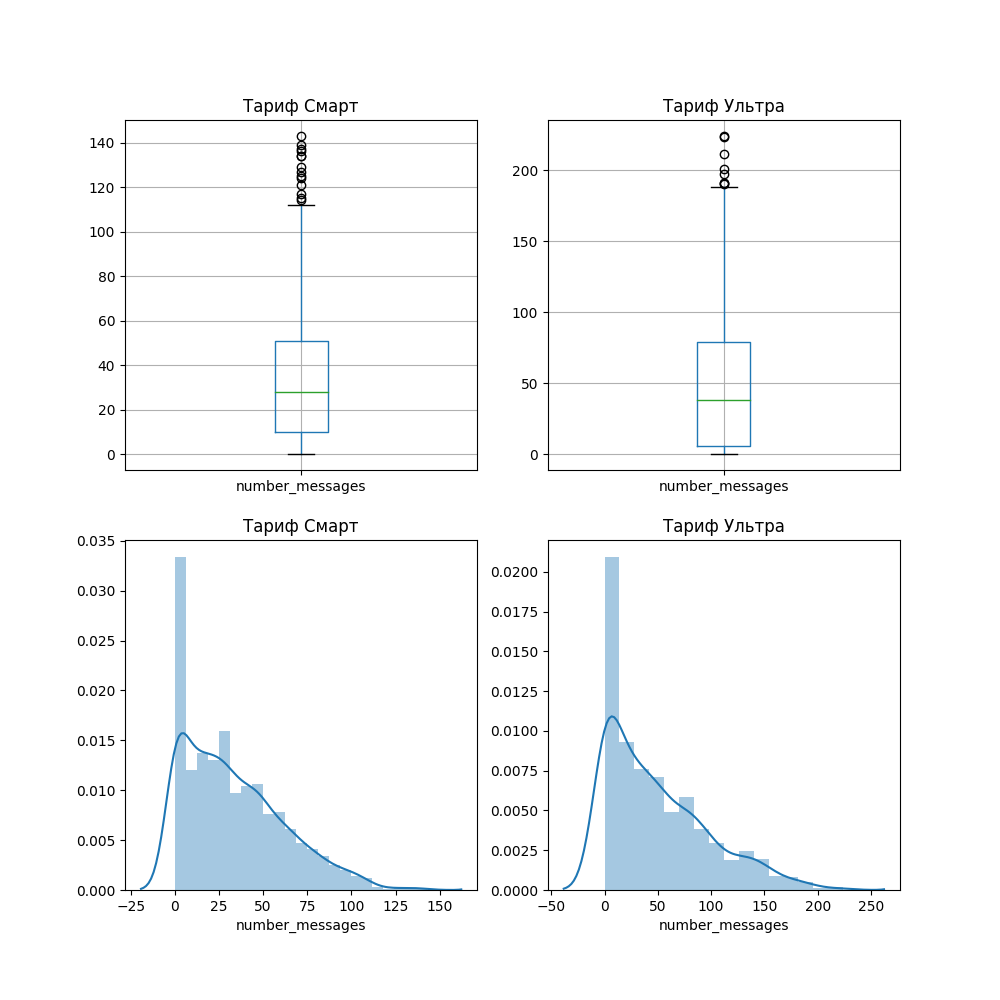

In [39]:
hist_boxplot('number_messages')

<IPython.core.display.Javascript object>


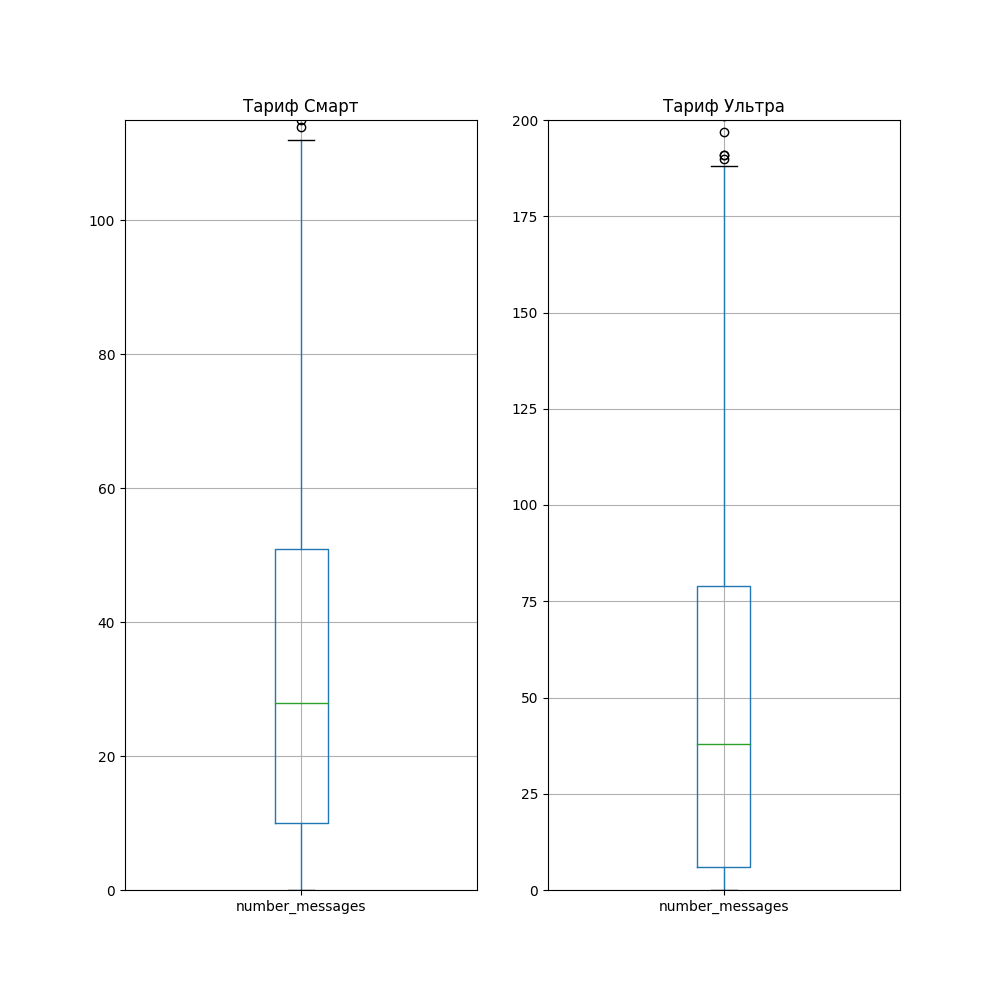

(0, 200)

In [40]:
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(1, 2, 1)
ax = smart_users.boxplot('number_messages')
ax.set_title("Тариф Смарт")
plt.ylim(0, 115)

area = fig.add_subplot(1, 2, 2)
ax = ultra_users.boxplot('number_messages')
ax.set_title("Тариф Ультра")
plt.ylim(0, 200)

In [41]:
#Уберем редкие и выбирающиеся значения (больше 112 для тарифа Сматр и больше 196 для тарифа Ультра)
smart_users_norm_call_message = smart_users_norm_call.query('number_messages < 112')
ultra_users_norm_call_message = ultra_users_norm_call.query('number_messages < 196')

Такая же ситуация с собщениями. В среднем пользователи укладываются в рамки тарифа, но часть доплачивает за сообщения сверх пакета - расход может быть более, чем в два раза (в их пакете 50 сообщений). У пользователей тарифа "Ультра" после окончания месяца виден значительный остаток - пользователи редко тратят до 250 сообщений (их лимит 1000).

#### Посмотрим распределение израсходованного трафика

<IPython.core.display.Javascript object>


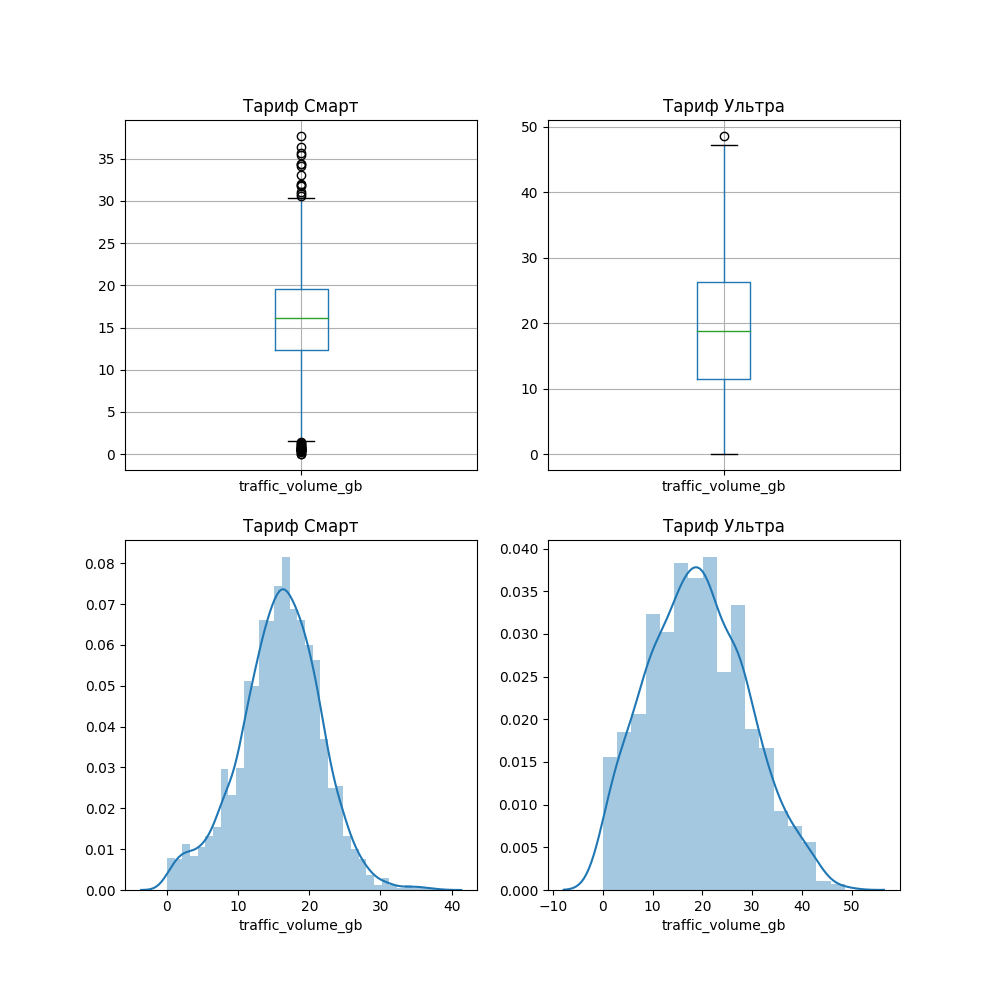

In [42]:
hist_boxplot('traffic_volume_gb')

<IPython.core.display.Javascript object>


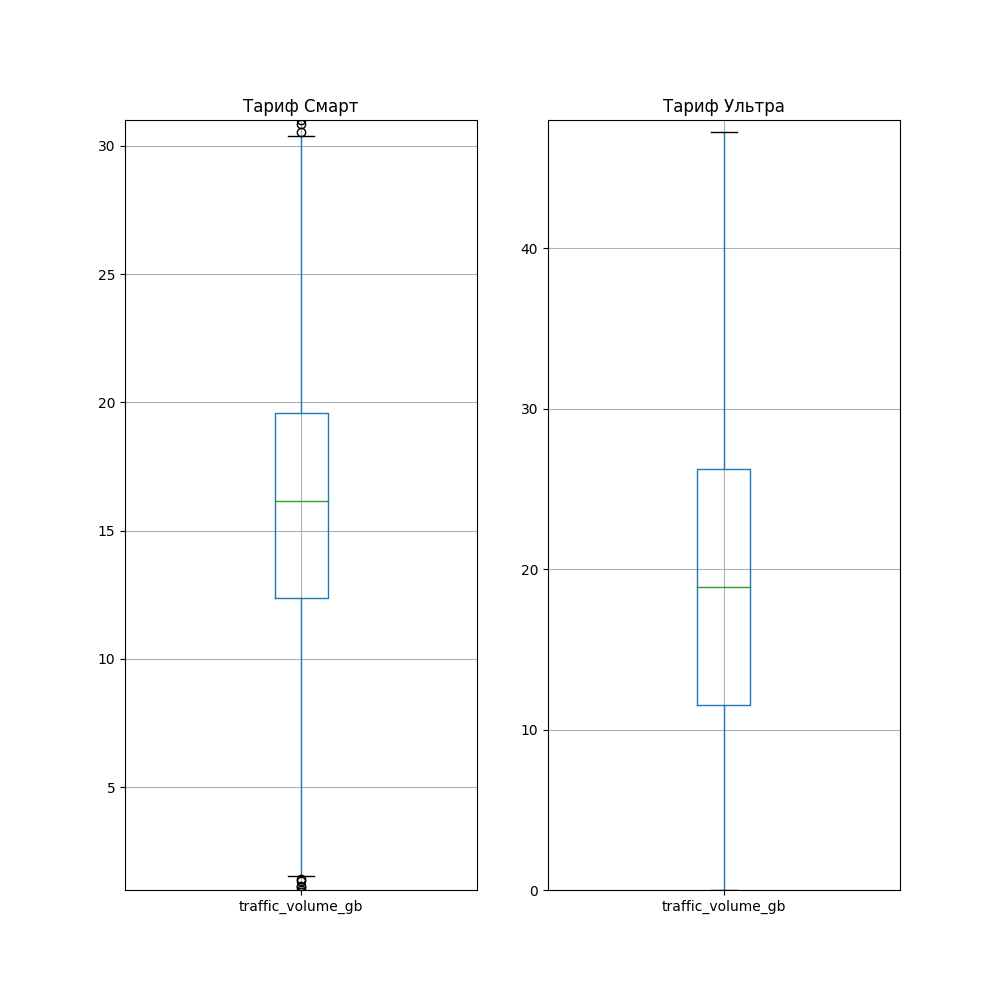

(0, 48)

In [43]:
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(1, 2, 1)
ax = smart_users.boxplot('traffic_volume_gb')
ax.set_title("Тариф Смарт")
plt.ylim(1, 31)

area = fig.add_subplot(1, 2, 2)
ax = ultra_users.boxplot('traffic_volume_gb')
ax.set_title("Тариф Ультра")
plt.ylim(0, 48)

In [44]:
#Уберем редкие и выбирающиеся значения (меньше 1.5 и больше 30.4 для тарифа Сматр и больше 47.5 для тарифа Ультра)
smart_users_final = smart_users_norm_call_message.query('traffic_volume_gb > 1.5 and traffic_volume_gb < 30.4')
ultra_users_final = ultra_users_norm_call_message.query('traffic_volume_gb < 47.5')

Дополнительные Гб покупают все. Пользователи тарифа "Ультра" в среднем укладываются в пакет (30 Гб), а пользователи "Смарта" нет (их лимит 15 Гб). Перерасход трафика для первых чаще укладывается в покупку дополнительных 15-20 Гб, а для вторых - 15-25 Гб.

In [45]:
# Посчитаем среднее, дисперсию и стандартное отклонение
mean_smatr_minutes = smart_users_final['number_minutes'].mean()
var_smatr_minutes = smart_users_final['number_minutes'].var()
std_smatr_minutes = np.std(smart_users_final['number_minutes'], ddof=1)
mean_ultra_minutes = ultra_users_final['number_minutes'].mean()
var_ultra_minutes = ultra_users_final['number_minutes'].var()
std_ultra_minutes = np.std(ultra_users_final['number_minutes'], ddof=1)
minutes_info_table = pd.DataFrame({"Смарт":[mean_smatr_minutes, var_smatr_minutes, std_smatr_minutes], 
                                "Ультра":[mean_ultra_minutes, var_ultra_minutes, std_ultra_minutes]})
minutes_info_table.index=['mean', 'var', 'std']
minutes_info_table

,Смарт,Ультра
mean,416.755074,523.917008
var,33046.107496,97038.740798
std,181.785884,311.510418


In [46]:
# Сведем в один график для наглядности
def plot_hist_all(column):
    mean_smart = smart_users_final[column].mean()
    var_smart = smart_users_final[column].var()
    std_smart = np.std(smart_users_final[column], ddof=1)
    mean_ultra = ultra_users_final[column].mean()
    var_ultra = ultra_users_final[column].var()
    std_ultra = np.std(ultra_users_final[column], ddof=1)
    
    
    fig, ax = plt.subplots(figsize=(10,7))
    smart_users_final[column].plot(kind='hist', bins=40, figsize=(9,5), ec='black', color='lightcoral', alpha=0.7, label='Смарт')
    ultra_users_final[column].plot(kind='hist', bins=70, figsize=(9,5), ec='black', color='mediumvioletred', alpha=0.7, label='Ультра')

    smart_legend = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, var_smart, std_smart)
    ultra_legend = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, var_ultra, std_ultra)
    legend_second = plt.legend([smart_legend, ultra_legend], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    ax.legend()

<IPython.core.display.Javascript object>


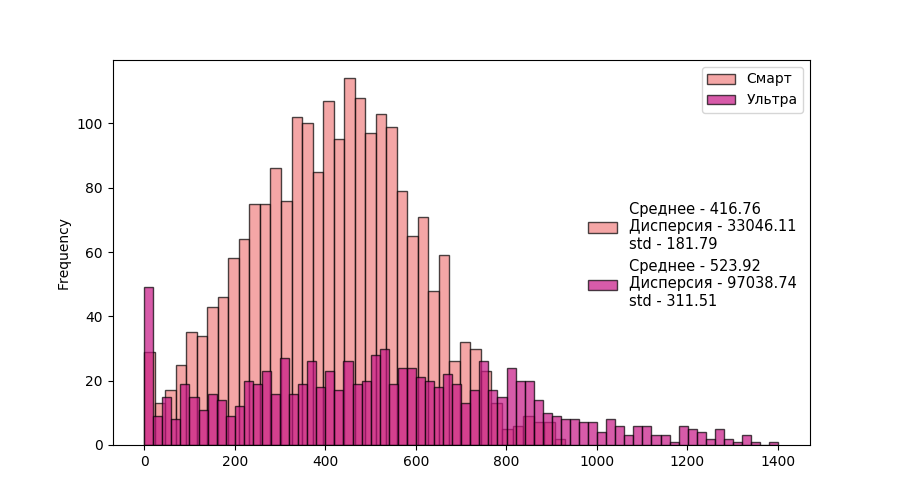

In [47]:
plot_hist_all('number_minutes')

In [48]:
mean_smatr_message = smart_users_final['number_messages'].mean()
var_smatr_message = smart_users_final['number_messages'].var()
std_smatr_message = np.std(smart_users_final['number_messages'], ddof=1)
mean_ultra_message = ultra_users_final['number_messages'].mean()
var_ultra_message = ultra_users_final['number_messages'].var()
std_ultra_message = np.std(ultra_users_final['number_messages'], ddof=1)
message_info_table = pd.DataFrame({"Смарт":[mean_smatr_message, var_smatr_message, std_smatr_message], 
                                "Ультра":[mean_ultra_message, var_ultra_message, std_ultra_message]})
message_info_table.index=['mean', 'var', 'std']
message_info_table

,Смарт,Ультра
mean,33.031365,48.395492
var,738.309122,2153.211631
std,27.171844,46.402711


<IPython.core.display.Javascript object>


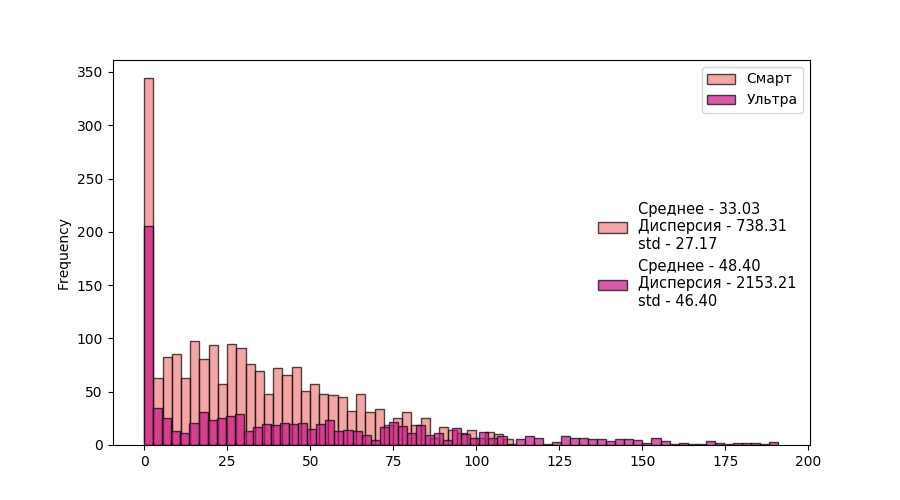

In [49]:
plot_hist_all('number_messages')

In [50]:
mean_smatr_traffic = smart_users_final['traffic_volume_gb'].mean()
var_smatr_traffic = smart_users_final['traffic_volume_gb'].var()
std_smatr_traffic = np.std(smart_users_final['traffic_volume_gb'], ddof=1)
mean_ultra_traffic = ultra_users_final['traffic_volume_gb'].mean()
var_ultra_traffic = ultra_users_final['traffic_volume_gb'].var()
std_ultra_traffic = np.std(ultra_users_final['traffic_volume_gb'], ddof=1)
traffic_info_table = pd.DataFrame({"Смарт":[mean_smatr_traffic, var_smatr_traffic, std_smatr_traffic], 
                                "Ультра":[mean_ultra_traffic, var_ultra_traffic, std_ultra_traffic]})
traffic_info_table.index=['mean', 'var', 'std']
traffic_info_table

,Смарт,Ультра
mean,15.870307,18.967986
var,28.944024,96.042600
std,5.379965,9.800133


<IPython.core.display.Javascript object>


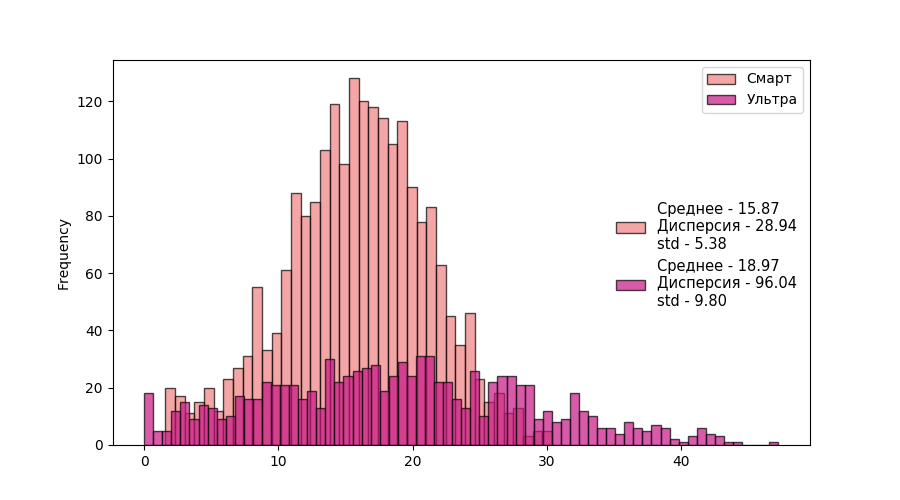

In [51]:
plot_hist_all('traffic_volume_gb')

<IPython.core.display.Javascript object>


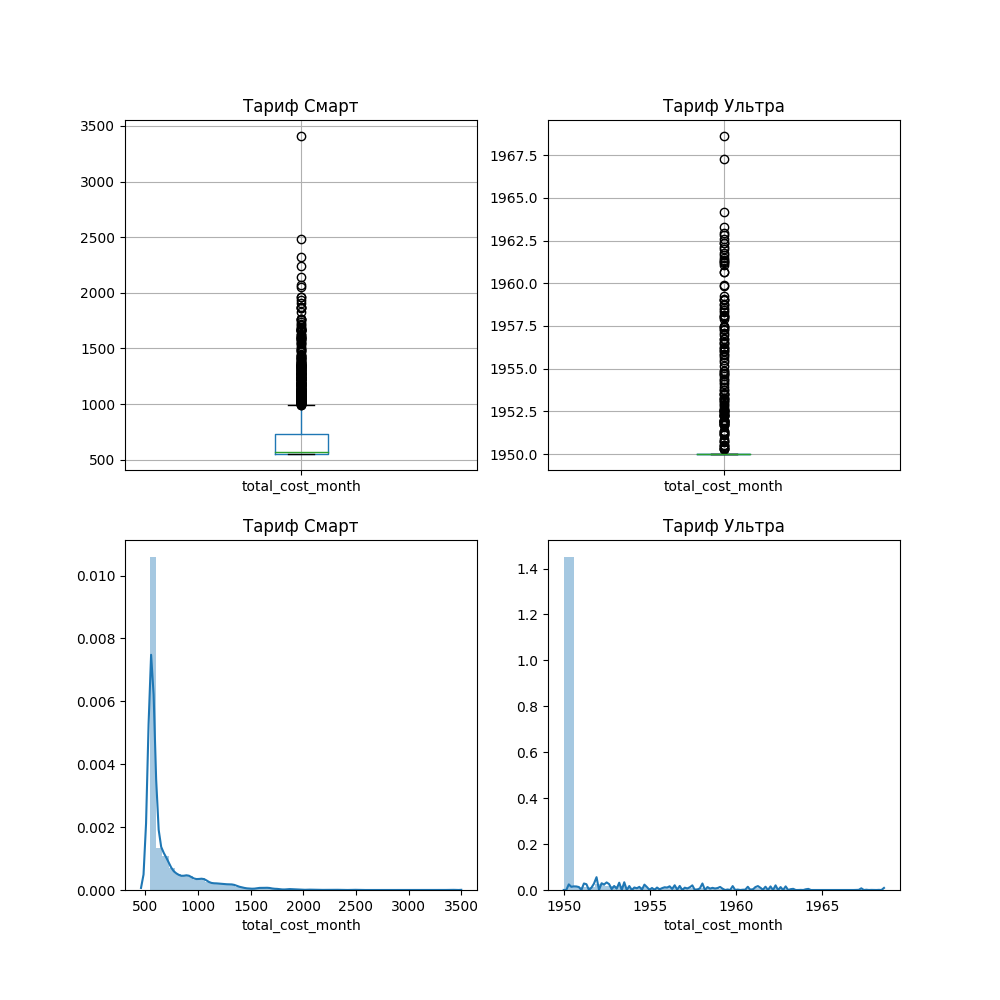

In [52]:
# Мы рассмотрели отдельные составляющие влияющие на выручку, интересно так же посмотреть на распределение самой выручки
hist_boxplot('total_cost_month')

<IPython.core.display.Javascript object>


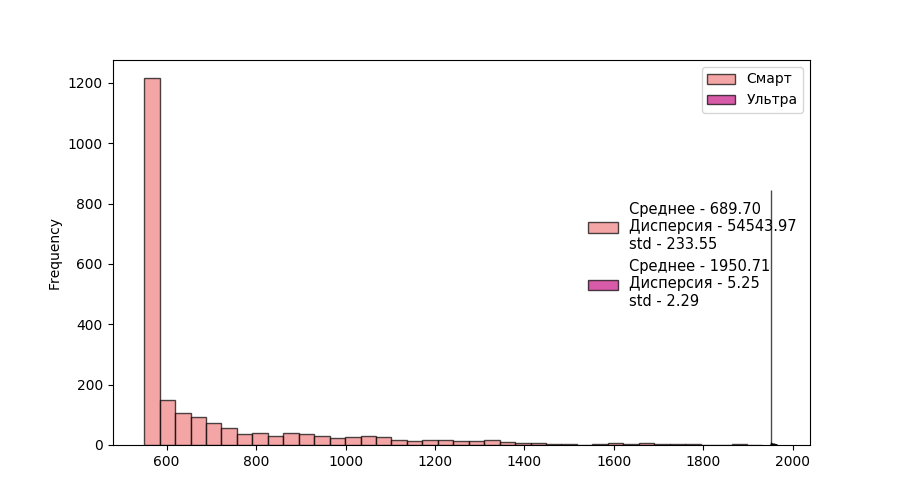

In [53]:
plot_hist_all('total_cost_month')

### Вывод

У тарифа "Ультра" больше абонентская плата, но пользователи данного тарифа редко выходят за рамки своего пакета. Для тарифа "Смарт" напротив, абонентская плата меньше более чем в 3 раза, но пользователи часто выходят за рамки лимитов и их общие расходы могут сравниться или даже превзойти расходы пользователей "Ультры"

### Проверка гипотез  <a name="hypothesis_testing"></a>

[к содержанию](#content)

Представлены две гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


Начнем с первой гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 
#### Формулировка нулевой гипотезы H₀ будет звучать так: средняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифов «Смарт».
#### Альтернативная гипотеза H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

In [54]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart_users_final['total_cost_month'], 
    ultra_users_final['total_cost_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


 У нас есть основание отвергнуть нулевую гипотезу о равенстве средней выручки разных тарифов.
 
 Посмотрим еще раз на среднюю выручку в выборке по тарифам:

In [55]:
print('Средняя выручка по пользователю тарифа "Смарт" в месяц: {:.2f}'.format(smart_users_final['total_cost_month'].mean()))
print('Средняя выручка по пользователю тарифа "Ультра" в месяц: {:.2f}'.format(ultra_users_final['total_cost_month'].mean()))

Средняя выручка по пользователю тарифа "Смарт" в месяц: 689.70
Средняя выручка по пользователю тарифа "Ультра" в месяц: 1950.71


Перейдем ко второй гипотезе: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 
#### Формулировка нулевой гипотезы H₀ будет звучать так: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
#### Альтернативная гипотеза H₁: средняя выручка пользователей из Москвы и из других регионов не равны.

In [56]:
# Разделим таблицу на части и избавимся от выбросов
moscow_users = df_total.query('city == "Москва"')
region_users = df_total.query('city != "Москва"')

<IPython.core.display.Javascript object>


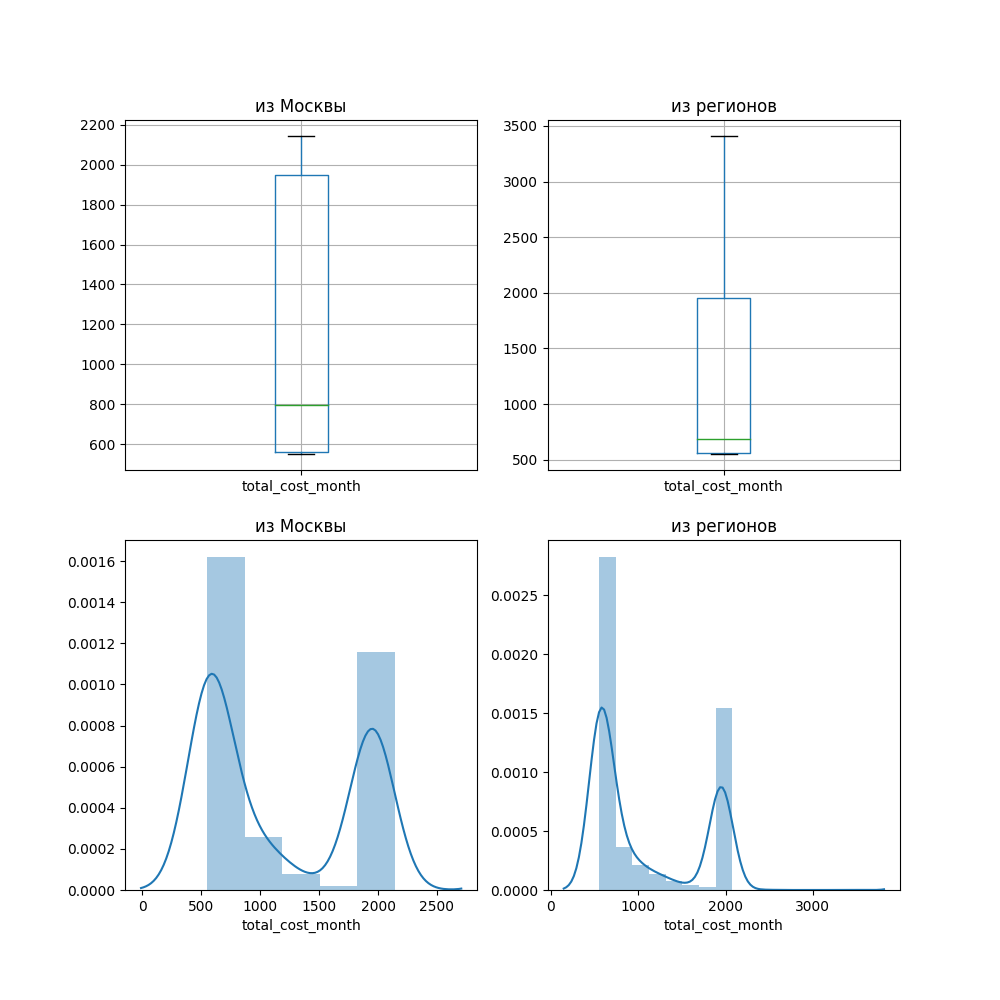

Text(0.5, 1.0, 'из регионов')

In [57]:
fig = plt.figure(figsize=(10,10))

area = fig.add_subplot(2, 2, 1)
ax = moscow_users.boxplot('total_cost_month')
ax.set_title("из Москвы")

area = fig.add_subplot(2, 2, 2)
ax = region_users.boxplot('total_cost_month')
ax.set_title("из регионов")

area = fig.add_subplot(2, 2, 3)
ax = sns.distplot(moscow_users['total_cost_month'])
ax.set_title("из Москвы")

area = fig.add_subplot(2, 2, 4)
ax = sns.distplot(region_users['total_cost_month'])
ax.set_title("из регионов")

In [58]:
#Уберем редкие и выбирающиеся значения (больше 2146 для Москвы и больше 3414 для регионов)
moscow_users_fin = moscow_users.query('total_cost_month < 2146')
region_users_fin = region_users.query('total_cost_month < 3414')

In [59]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    moscow_users_fin['total_cost_month'], 
    region_users_fin['total_cost_month'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0019985267562609376
Отвергаем нулевую гипотезу


 У нас есть основание отвергнуть нулевую гипотезу о равенстве средней выручки в Москве и в регионах.
 Посмотрим, насколько отличаются средние в выборках

In [60]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(moscow_users_fin['total_cost_month'].mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(region_users_fin['total_cost_month'].mean()))

Средняя выручка по пользователю в месяц в Москве: 1152.90
Средняя выручка по пользователю в месяц в регионах: 1067.27


### Вывод

После проверки гипотез мы можем преполагать, что средняя выручка между тарифами и между регионами не равны. 
Разница между выручкой для разных тарифов более существенна (данные в выборке различаются в 3 раза, тогда как разница для разных регионов менее 100 р.).

### Общий вывод  <a name="results"></a>

[к содержанию](#content)

В ходе исследование рассматривались два тарифа оператора "Смарт" и "Ультра".
Абонентская плата "Сматра" составляет 550 руб., тогда как у "Ультры" она 1950 руб. Средняя выручка первого тарифа уступает второму. Однако, пользователи тарифа "Смарт" в 75% случает оплачивают услуги сверх лимитов, тогда как пользователи "Ультры" крайне редко оплачивают дополниельные расходы (и это только оплата за интернет).

Среднему пользователю тарифа "Смарт" не хватает 2 Гб интернета сверх лимита и он доплачивает по 200 рублей за каждый. Также количество используемых минут разговора находится на грани лимита (418 мин из 500).
У среднего пользователя тарифа "Ультра" на конец месяца остаются неизрасходованные минуты, сообщения, а зачастую и Гб.